In [140]:
import argparse
import os
import time

import numpy as np
import tensorflow.compat.v2 as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_valid, y_valid) = cifar10.load_data()

# Step 1 - Explore my dataset (CIFAR10)

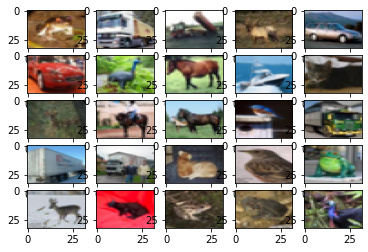

In [141]:

# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1
 
plt.show()

In [142]:
print("Image size {}x{}".format(X_train.shape[1], X_train.shape[2]))
print("Number of training examples:", X_train.shape[0])
print("Number of validation examples:", X_valid.shape[0])
print("Number of categories/classes:", len(np.unique(y_train)))

Image size 32x32
Number of training examples: 50000
Number of validation examples: 10000
Number of categories/classes: 10


## Step 2 - Train my model

In [143]:
# hyper-parameters
batch_size = 32
epoch = 5
mirrored_strategy = tf.distribute.MirroredStrategy()

# create the model
with mirrored_strategy.scope():
    model = ResNet50(weights=None, input_shape=(32, 32, 3), classes=3)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


# prepare data
(X_train, y_train), (X_valid, y_valid) = cifar10.load_data()

# Reduce dataset to 3 classes of images
# for faster training time
train_idx,_ = np.where((y_train == 0) | (y_train == 1) | (y_train ==2))
X_train = X_train[train_idx]
y_train = y_train[train_idx]
val_idx,_ = np.where((y_valid == 0) | (y_valid == 1) | (y_valid == 2))
X_valid = X_valid[val_idx]
y_valid = y_valid[val_idx]

# One-hot encode categories
Y_train = to_categorical(y_train, 3)
Y_valid = to_categorical(y_valid, 3)

# Convert pixels to float
X_train = X_train.astype("float32")
X_valid = X_valid.astype("float32")

mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_valid -= mean_image
X_train /= 128.0
X_valid /= 128.0


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [ ]:
# Train
model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epoch,
    validation_data=(X_valid, Y_valid),
    shuffle=True,
    verbose=0,
)

## Step 3 - Evaluate my model

### Plot accuracy

Text(0.5, 0, 'Epoch')

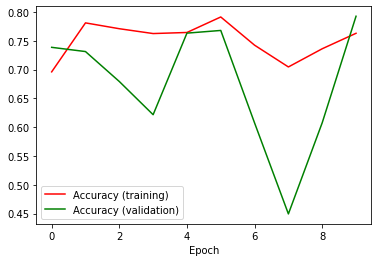

In [114]:
# Plot accuracy per iteration
plt.plot(result.history['accuracy'], label='Accuracy (training)', color='red')
plt.plot(result.history['val_accuracy'], label='Accuracy (validation)', color='green')
plt.legend()
plt.xlabel("Epoch")

### Visualize the learning curve

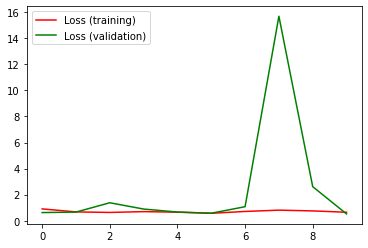

In [115]:
# Plot 
plt.plot(result.history['loss'], label='Loss (training)', color='red')
plt.plot(result.history['val_loss'], label='Loss (validation)', color='green')
plt.legend()

### Save the model

In [116]:
model.save('cifarmodel.h5')

/usr/local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
